# Week 3 handin

## 01 Assignment
Here is the text for the assignment linked to

In [ ]:
# 02 Status
#Obligatoriske opgaver er lavet, havde store problemer med at skabe Studentobjekter fra nested array i .csv fil. #Løsning i metode make_list_from_csv virker men er ikke sikker på det er den optimale måde at gøre det på.


## 03 Solution part 1

In [2]:
# Exercise 1.1-7 Method that creates n number of students
%matplotlib inline
%matplotlib notebook
import random
import csv
import ast
import platform
%matplotlib notebook
import matplotlib.pyplot as plt
from modules.week3 import Student,Course,DataSheet

if platform.system() == 'Windows':
    newline = ''
else:
    newline = None
names_genders_urls = [('John', 'm', 'img1'), ('Kate', 'f', 'img2'), ('Marie', 'f', 'img3'), ('Fred', 'm', 'img4'),
                      ('Ann', 'f', 'img5'), ('Max', 'm', 'img6'), ('Roy', 'm', 'img7'), ('Rebecca', 'f', 'img8'),
                      ('Keith', 'm', 'img9'), ('Sandra', 'f', 'img10')]

course1 = Course('Biology', 'A1', 'George', 10)
course2 = Course('Math', 'B2', 'Smiley', 15)
course3 = Course('Geography', 'C3', 'Karen', 20)
course4 = Course('History', 'D4', 'Simon', 25)
course5 = Course('Physics', 'E5', 'Kelly', 30)
course6 = Course('Chemistry', 'F6', 'Donald', 35)

courses = [course1, course2, course3, course4, course5, course6]

grades = [-3, 0, 2, 4, 7, 10, 12]


def create_random_students(number):
    result = []
    i = 1
    ii = 0
    while i <= number:
        r1 = random.randint(0, 5)
        r_course = random.sample(courses, r1 + 1)
        student_courses = []
        for cr in r_course:
            cr.grade = random.choice(grades)
            student_courses.append(cr)
        ds = DataSheet(student_courses)
        stud = Student(names_genders_urls[ii][0], names_genders_urls[ii][1], names_genders_urls[ii][2], ds)

        result.append(stud)
        ii += 1
        i += 1
    return result

my_list = create_random_students(10)
print(my_list)


[Name: ('John','m',1,'img1'), Name: ('Kate','f',3,'img2'), Name: ('Marie','f',4,'img3'), Name: ('Fred','m',3,'img4'), Name: ('Ann','f',1,'img5'), Name: ('Max','m',6,'img6'), Name: ('Roy','m',3,'img7'), Name: ('Rebecca','f',3,'img8'), Name: ('Keith','m',6,'img9'), Name: ('Sandra','f',2,'img10')]


In [3]:
# 1.7A Writes students list to .csv
def write_studs_to_csv(st_list):
    with open("students2.csv", 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)

        for student in st_list:
            student_courses = []

            for course in student.data_sheet.courses:
                student_courses.append([course.name, course.class_room, course.teacher, course.etcs, course.grade])
            output_writer.writerow(
                [student.name, student.gender, student_courses, student.image_url]
            )

write_studs_to_csv(my_list)


In [4]:
#Ex 8A Make list of students from .csv file and print each stud.name, img, av grade
def make_list_from_csv():
    result = []
    with open('students2.csv') as source:
        reader = csv.reader(source)
        for row in reader:
            student_name = row[0]
            student_gender = row[1]
            stud_crs = ast.literal_eval(row[2])
            student_img = row[3]
            st_courses = []
            for next_course in stud_crs:
                next_course = Course(next_course[0], next_course[1], next_course[2], next_course[3], next_course[4])
                st_courses.append(next_course)

            student_ds = DataSheet(st_courses)
            new_student = Student(student_name, student_gender, student_img, student_ds)
            result.append(new_student)

    return result

print(make_list_from_csv())


[Name: ('John','m',1,'img1'), Name: ('Kate','f',3,'img2'), Name: ('Marie','f',4,'img3'), Name: ('Fred','m',3,'img4'), Name: ('Ann','f',1,'img5'), Name: ('Max','m',6,'img6'), Name: ('Roy','m',3,'img7'), Name: ('Rebecca','f',3,'img8'), Name: ('Keith','m',6,'img9'), Name: ('Sandra','f',2,'img10')]


<IPython.core.display.Javascript object>


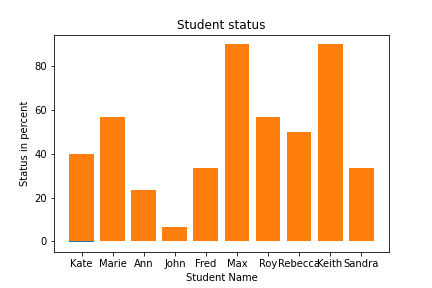

In [5]:
#8B+C sort the list by avg_grade and make bar chart showing avg grade
def stud_avg_grade(student):
    return student.get_avg_grade()

def create_barchart(list_students):
    list_students.sort(key=stud_avg_grade)
    names = []
    grades = []
    for student in list_students:
        names.append(student.name)
        grades.append(stud_avg_grade(student))
    plt.bar(names, grades)
    plt.xlabel("Student Names")
    plt.ylabel("Average Grades")
    plt.title("Student Grades")

    plt.show()

stud_list = create_random_students(5)
create_barchart(stud_list)

In [6]:
#9 Make a method on Student class that can show progression of the study in %
def show_prog(list_students):
    names = []
    status = []
    for student in list_students:
        names.append(student.name)
        status.append(student.ects_status())
    plt.bar(names, status)
    plt.xlabel("Student Name")
    plt.ylabel("Status in percent")
    plt.title("Student status")

    plt.show()


show_prog(my_list)

In [ ]:
#10 chart of distribution of study progression
def progress_sort(student):
    return student.ects_status()

def progress_distr(st_list):
    st_list.sort(key=progress_sort)
    progression = {}
    category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]

    for student in st_list:
        s_progress = student.ects_status()
        for category in category_steps:
            if s_progress >= category:
                c_progress = str(category) + "%"
                if not c_progress in progression:
                    progression[c_progress] = 1
                else:
                    progression[c_progress] = progression[c_progress] + 1
                break

    progress = list(progression.keys())
    no_of_students = list(progression.values())

    plt.bar(progress, no_of_students)
    plt.xlabel("Deciles")
    plt.ylabel("Number of students")
    plt.title("Status distribution")

    plt.show()

progress_distr(my_list)

## 04 Solution part 2

In [ ]:
# 2.1